# Texas Census to BTTN Conflation

This example notebook demonstrates the use of Jupyter Notebook, PostgreSQL + PostGIS, and Python to spatially join census data to Texas Department of Transportation's Bicycle Tourism Trails (BTT) Example Network.

## Project Goal

Determine the income distribution of households living within 5 km of TxDOT's Bicycle Tourism Trail Network (BTTN).


## Data Sources

* Bicycle Tourism Trails (BTT) Example Network Shapefile (EPSG:3857)
* ACS 5-Year Estimates 2012 – 2017 Table B19001 "HOUSEHOLD INCOME IN THE PAST 12 MONTHS IN 2017 INFLATION-ADJUSTED DOLLARS" (EPSG:4326)
* ACS 2017 TIGER/Line Shapefile - Block Groups (EPSG:4269)


## Steps

1. Load the BTTN and Census Shapefiles
2. Load the Census ACS data with household income
3. Create a 5 km buffer around the BTTN
4. Measure the overlapping portion between each Census Block Group shape and the BTTN buffer
5. Join the apportioned Census household income data to the BTTN buffer
6. Visualize the results

## Pre-reqs

* PostgreSQL with PostGIS extension installed
* Python 3
* SQL Extension for Jupyter Notebook

## A Note on Spatial Projections

Length and area spatial calculations cannot (easily) be done using a lat/long projection (e.g. Web Mercator). For the purposes of our work below, we'll reproject each shapefile as we load it into a common ** WGS 84 / UTM Zone 13N ** projection (EPSG:32613) which measures all coordinates in _meters_.

In [1]:
import os
import psycopg2
import io

# PostgreSQL Connection String
DSN = "dbname=bttn user=postgres"

## Create the database and enable the PostGIS extension

In [2]:
!createdb bttn

In [3]:
!psql -c "CREATE EXTENSION postgis;" bttn

CREATE EXTENSION


### Load the SQL Extension for Jupyter Notebook and Connect

\* Note: if you do not have the SQL Extension installed, simply replace the \%\%sql cells  with a shell command: `psql -c "SQL QUERY" bttn`

In [4]:
%load_ext sql

In [5]:
%%sql
postgresql://postgres:@localhost/bttn

'Connected: postgres@bttn'

## Load the Bicycle Tourism Trails Network Shapefile

In [6]:
!shp2pgsql -s 3857:32613 -dI "shp/bttn/btt.shp" bttn | psql -d bttn

Field objectid is an FTDouble with width 20 and precision 0
Field miles is an FTDouble with width 24 and precision 15
Field shape__len is an FTDouble with width 24 and precision 15
Shapefile type: Arc
Postgis type: MULTILINESTRING[2]
SET
SET
ERROR:  column not found in geometry_columns table
CONTEXT:  PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying,character varying) line 34 at RAISE
SQL statement "SELECT public.DropGeometryColumn('',$1,$2,$3)"
PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying) line 5 at SQL statement
NOTICE:  table "bttn" does not exist, skipping
DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                    addgeometrycolumn                     
----------------------------------------------------------
 public.bttn.geom SRID:32613 TYPE:MULTILINESTRING DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
CREATE INDEX
COMMIT
ANALYZE


## Load Census Data

### Load the 2017 TIGER/Line Census Block Group Shapefile (Texas)

In [8]:
!shp2pgsql -s 4269:32613 -dI "shp/tl_2017_48_bg/tl_2017_48_bg.shp" tl_2017_48_bg | psql -d bttn

Field aland is an FTDouble with width 14 and precision 0
Field awater is an FTDouble with width 14 and precision 0
Shapefile type: Polygon
Postgis type: MULTIPOLYGON[2]
SET
SET
ERROR:  column not found in geometry_columns table
CONTEXT:  PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying,character varying) line 34 at RAISE
SQL statement "SELECT public.DropGeometryColumn('',$1,$2,$3)"
PL/pgSQL function dropgeometrycolumn(character varying,character varying,character varying) line 5 at SQL statement
NOTICE:  table "tl_2017_48_bg" does not exist, skipping
DROP TABLE
BEGIN
CREATE TABLE
ALTER TABLE
                       addgeometrycolumn                        
----------------------------------------------------------------
 public.tl_2017_48_bg.geom SRID:32613 TYPE:MULTIPOLYGON DIMS:2 
(1 row)

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
IN

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1
INSERT 0 1

### Load ACS 2012 - 2017 Household Income Tabular Data

First, create the destination table. Then, copy in the tabular data. This can be done directly with SQL (a full path is required—a relative path can be used if known relative to PostgreSQL's binaries). Alternatively, this can be done using Python with `psycopg2.cursor().copy_from()`, e.g. (not run):

```
conn = psycopg2.connect(DSN)
cur = conn.cursor()

cur.execute("""
CREATE TABLE acs_income (
    geoid TEXT,
    households_total INTEGER,
    households_0_10k INTEGER,
    households_10_15k INTEGER,
    households_15_20k INTEGER,
    households_20_25k INTEGER,
    households_25_30k INTEGER,
    households_30_35k INTEGER,
    households_35_40k INTEGER,
    households_40_45k INTEGER,
    households_45_50k INTEGER,
    households_50_60k INTEGER,
    households_60_75k INTEGER,
    households_75_100k INTEGER,
    households_100_125k INTEGER,
    households_125_150k INTEGER,
    households_150_200k INTEGER,
    households_200k_plus INTEGER
);
"""

f = open('data/ACS_17_5YR_B19001.csv, 'r')
f.readline() # skip the header line
cur.copy_from(f, 'acs_income', sep=',', null='')

conn.commit()
            
cur.close()
conn.close()
```

In [9]:
%%sql
CREATE TABLE acs_income (
    geoid TEXT,
    households_total INTEGER,
    households_0_10k INTEGER,
    households_10_15k INTEGER,
    households_15_20k INTEGER,
    households_20_25k INTEGER,
    households_25_30k INTEGER,
    households_30_35k INTEGER,
    households_35_40k INTEGER,
    households_40_45k INTEGER,
    households_45_50k INTEGER,
    households_50_60k INTEGER,
    households_60_75k INTEGER,
    households_75_100k INTEGER,
    households_100_125k INTEGER,
    households_125_150k INTEGER,
    households_150_200k INTEGER,
    households_200k_plus INTEGER
);

COPY acs_income (
    geoid, households_total, households_0_10k, households_10_15k, households_15_20k, 
    households_20_25k, households_25_30k, households_30_35k, households_35_40k, 
    households_40_45k, households_45_50k, households_50_60k, households_60_75k, 
    households_75_100k, households_100_125k, households_125_150k, households_150_200k, 
    households_200k_plus
)
FROM '/Users/markegge/projects/postgres_bttn/data/ACS_17_5YR_B19001.csv' -- requires a full path
WITH CSV HEADER;

Done.
15811 rows affected.


[]

## Buffer the BTTN Shape

Buffer by 5000 m. Create a spatial index.

In [10]:
%%sql

DROP TABLE IF EXISTS bttn_buffered CASCADE;

CREATE TABLE bttn_buffered AS
SELECT
    gid, objectid, type, miles, existing_f, 
    future_fac, status_, prelim_rte,
    ST_Buffer(geom, 5000) AS geom
FROM bttn;

CREATE INDEX btt_geom_idx ON bttn_buffered USING GIST (geom);

Done.
1445 rows affected.
Done.


[]

## Calculate the overlap between Census Block Groups and BTTN Segments

First, determine the percent overlap between each Census Block Group shape and each BTTN buffer shape:

In [11]:
%%sql

DROP TABLE IF EXISTS overlap;

CREATE TABLE overlap AS (
    SELECT 
        btt.gid AS btt_gid,
        btt.objectid AS btt_objectid, 
        ST_Area(btt.geom) AS btt_area,
        bg.geoid AS acs_geoid,
        ST_Area(bg.geom) AS acs_area,
        ST_Area(ST_Intersection(btt.geom, bg.geom)) AS overlap_area,
        households.*
    FROM bttn_buffered btt
    JOIN tl_2017_48_bg bg ON ST_Intersects(btt.geom, bg.geom)
    INNER JOIN acs_income households USING (geoid)
);

Done.
41796 rows affected.


[]

In [12]:
%%sql

ALTER TABLE overlap ADD COLUMN overlap_pct NUMERIC;

UPDATE overlap SET overlap_pct = overlap_area / acs_area;

Done.
41796 rows affected.


[]

In [13]:
%%sql
SELECT SUM(households_total) FROM overlap;

1 rows affected.


sum
23938758


In [14]:
%%sql

UPDATE overlap SET
households_total = (households_total * overlap_pct)::INTEGER,
households_0_10k = (households_0_10k * overlap_pct)::INTEGER,
households_10_15k = (households_10_15k * overlap_pct)::INTEGER,
households_15_20k = (households_15_20k * overlap_pct)::INTEGER,
households_20_25k = (households_20_25k * overlap_pct)::INTEGER,
households_25_30k = (households_25_30k * overlap_pct)::INTEGER,
households_30_35k = (households_30_35k * overlap_pct)::INTEGER,
households_35_40k = (households_35_40k * overlap_pct)::INTEGER,
households_40_45k = (households_40_45k * overlap_pct)::INTEGER,
households_45_50k = (households_45_50k * overlap_pct)::INTEGER,
households_50_60k = (households_50_60k * overlap_pct)::INTEGER,
households_60_75k = (households_60_75k * overlap_pct)::INTEGER,
households_75_100k = (households_75_100k * overlap_pct)::INTEGER,
households_100_125k = (households_100_125k * overlap_pct)::INTEGER,
households_125_150k = (households_125_150k * overlap_pct)::INTEGER,
households_150_200k = (households_150_200k * overlap_pct)::INTEGER;

41796 rows affected.


[]

In [15]:
%%sql
SELECT SUM(households_total) FROM overlap;

1 rows affected.


sum
16862791


Now, using Pandas, let's grab out the data from the database and transform it into something we can display.

In [16]:
import pandas as pd

with psycopg2.connect(DSN) as conn:
    df = pd.read_sql_query("SELECT * FROM overlap;", conn)

df.head()

,btt_gid,btt_objectid,btt_area,acs_geoid,acs_area,overlap_area,geoid,households_total,households_0_10k,households_10_15k,...,households_40_45k,households_45_50k,households_50_60k,households_60_75k,households_75_100k,households_100_125k,households_125_150k,households_150_200k,households_200k_plus,overlap_pct
0,73,1132.0,8.110658e+07,480019505002,2.213107e+06,2.213107e+06,480019505002,177,38,16,...,0,12,0,0,0,0,0,0,0,1.0
1,197,30.0,8.400706e+07,480019505002,2.213107e+06,2.213107e+06,480019505002,177,38,16,...,0,12,0,0,0,0,0,0,0,1.0
2,355,1134.0,8.906722e+07,480019505002,2.213107e+06,2.213107e+06,480019505002,177,38,16,...,0,12,0,0,0,0,0,0,0,1.0
3,801,1374.0,1.182061e+08,480019505002,2.213107e+06,2.213107e+06,480019505002,177,38,16,...,0,12,0,0,0,0,0,0,0,1.0
4,1069,1131.0,1.781937e+08,480019505002,2.213107e+06,2.213107e+06,480019505002,177,38,16,...,0,12,0,0,0,0,0,0,0,1.0


In [17]:
# melt our data
mlt = pd.melt(df, 
        id_vars=['geoid'], 
        value_vars=['households_0_10k', 'households_10_15k', 'households_15_20k', 
                    'households_20_25k', 'households_25_30k', 'households_30_35k', 
                    'households_35_40k', 'households_40_45k', 'households_45_50k', 
                    'households_50_60k', 'households_60_75k', 'households_75_100k', 
                    'households_100_125k', 'households_125_150k', 'households_150_200k', 
                    'households_200k_plus'],
             var_name='group',
             value_name='households')

In [18]:
mlt.head()

,geoid,group,households
0,480019505002,households_0_10k,38
1,480019505002,households_0_10k,38
2,480019505002,households_0_10k,38
3,480019505002,households_0_10k,38
4,480019505002,households_0_10k,38


In [19]:
grouped = mlt.groupby('group', as_index=False)[['households']].sum()

In [20]:
grouped.head()

,group,households
0,households_0_10k,1416769
1,households_100_125k,1255046
2,households_10_15k,911720
3,households_125_150k,774644
4,households_150_200k,845728


In [21]:
grouped['group_lower'] = grouped['group'].str.extract(r'_(.+?)k?_', expand=False)

In [22]:
grouped['group_lower'] = pd.to_numeric(grouped.group_lower)

In [23]:
grouped.sort_values('group_lower', inplace=True)

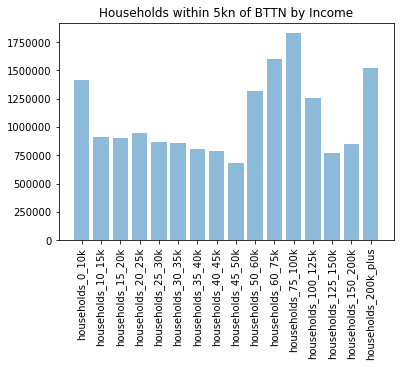

In [25]:
import matplotlib.pyplot as plt
import numpy as np

y_pos = np.arange(len(grouped))
plt.bar(y_pos, grouped['households'], alpha=0.5)
plt.xticks(y_pos, grouped['group'], rotation=90)
plt.title('Households within 5kn of BTTN by Income')
plt.show()